importing libraries and dataset

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv('bank.csv', sep=';')  
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


checking dataset info

In [4]:
print(df.isnull().sum())
print(df.describe())
print(df.info())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  45

checking for outliers

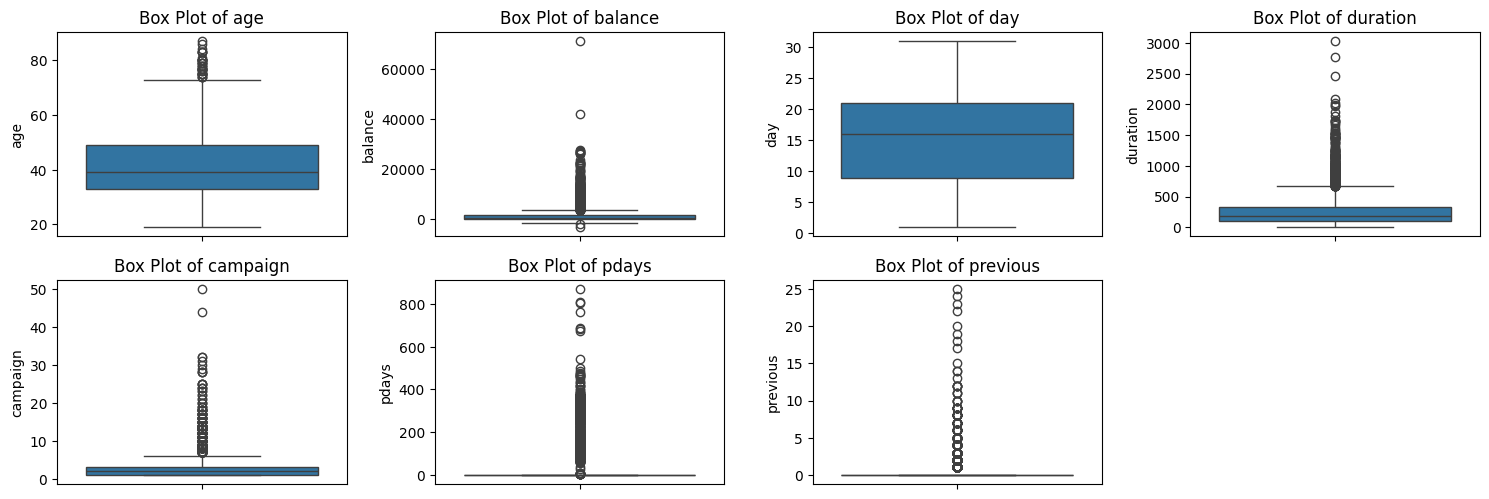

In [5]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()        # Select only numerical columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()

plt.show()

removing outliers

In [6]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the data to remove outliers
df_filtered = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

# Display the shape of the original and filtered data
print(f'Original data shape: {df.shape}')
print(f'Filtered data shape: {df_filtered.shape}')

Original data shape: (4521, 17)
Filtered data shape: (2803, 17)


after removing outliers

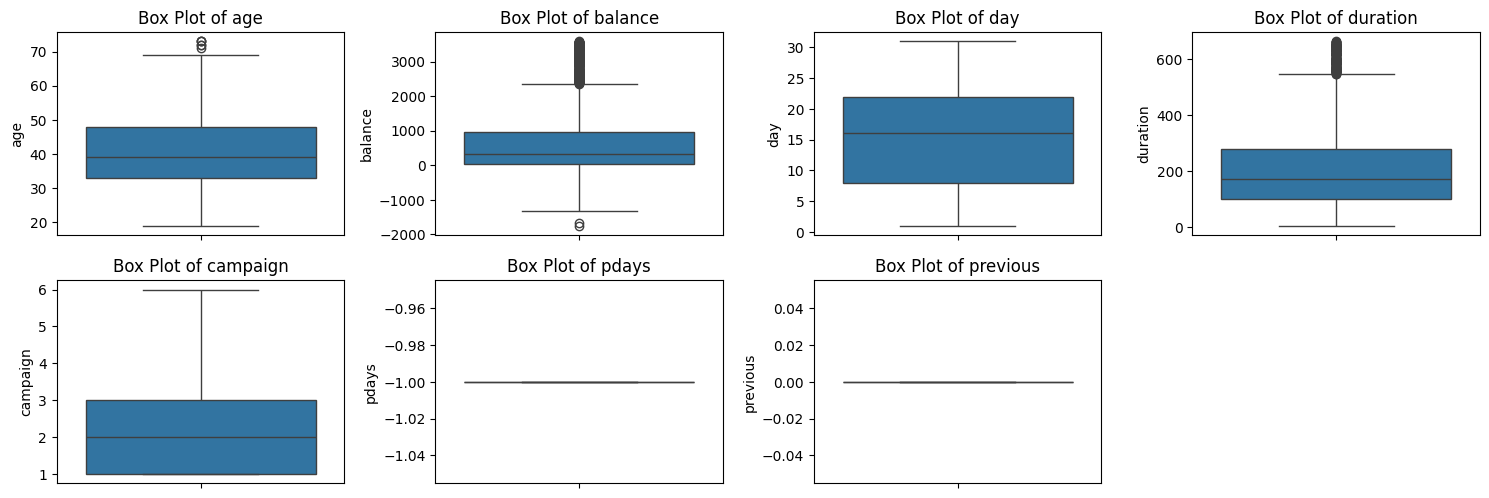

In [7]:
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns.tolist()      # Select only numerical columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_filtered[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

handling categorical data

In [8]:
# Identify categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Initialize label encoder


le = LabelEncoder()
# Apply label encoding to each categorical column
for column in categorical_columns:
    df_filtered[column] = le.fit_transform(df_filtered[column])

print(df_filtered)

      age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1787        0     0        0   
3      30    4        1          2        0     1476        1     1        2   
4      59    1        1          1        0        0        1     0        2   
7      39    9        1          1        0      147        1     0        0   
8      41    2        1          2        0      221        1     0        2   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4510   36    9        0          1        0      566        1     0        2   
4512   40    1        1          1        0     1100        1     0        2   
4513   49    1        1          1        0      322        0     0        0   
4515   32    7        2          1        0      473        1     0        0   
4516   33    7        1          1        0     -333        1     0        0   

      day  month  duration  campaign  p

C:\Users\pooja konduri\AppData\Local\Temp\ipykernel_52008\3884957514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column])
C:\Users\pooja konduri\AppData\Local\Temp\ipykernel_52008\3884957514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column])
C:\Users\pooja konduri\AppData\Local\Temp\ipykernel_52008\3884957514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

dividing target varible and feature

In [9]:
X = df_filtered.drop('y', axis=1)
y = df_filtered['y'].map({'yes': 1, 'no': 0}) 


correlation matrix using heatmap

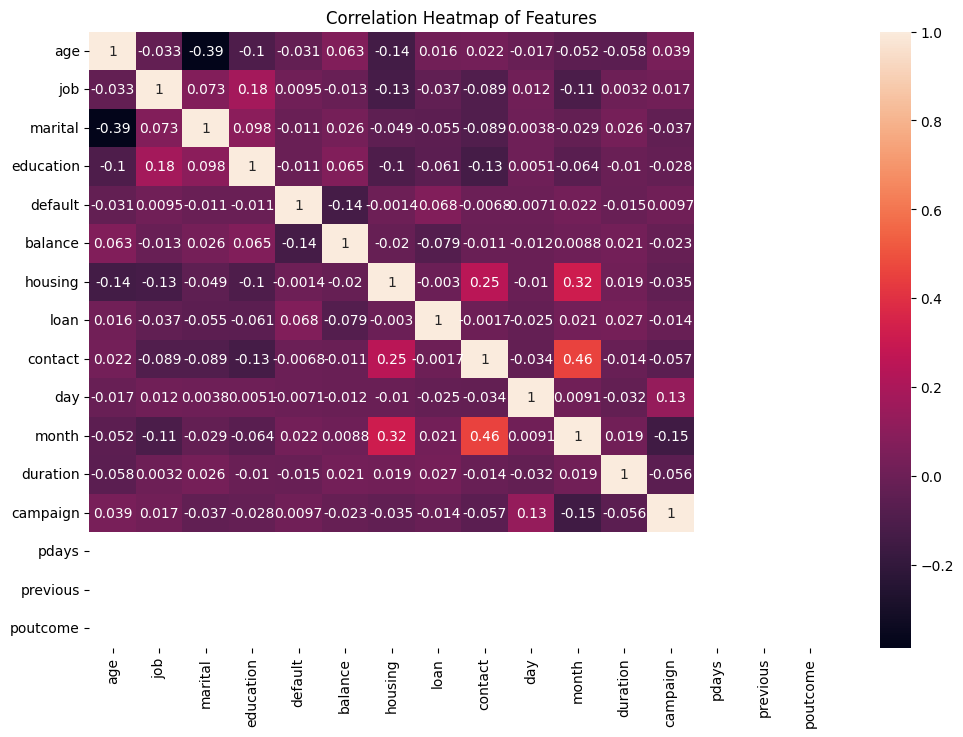

In [10]:
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Features')
plt.show()

splitting and feature scaling

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the already-fitted scaler
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of standardized X_train:\n", X_train_scaled[:5])

First 5 rows of standardized X_train:
 [[-0.87211774 -0.14740958  1.44017521  1.05966941 -0.15256816  0.03827924
   0.88762536  2.21359436 -0.81833985  0.50173181 -1.90774821 -0.4183723
  -0.14833517  0.          0.          0.        ]
 [ 2.63737349  0.1563517  -0.2319495  -1.63854617 -0.15256816  1.92949406
  -1.12660142 -0.45175395 -0.81833985  0.01889772 -1.90774821 -0.58189451
  -0.8906732   0.          0.          0.        ]
 [-1.07266009 -0.14740958  1.44017521  1.05966941 -0.15256816 -0.54460581
   0.88762536 -0.45175395  1.30027209 -1.55031308  0.16419018  0.07219435
  -0.14833517  0.          0.          0.        ]
 [-0.87211774 -0.14740958  1.44017521  1.05966941 -0.15256816  1.38914697
   0.88762536 -0.45175395 -0.81833985  0.50173181 -1.90774821 -0.84080469
  -0.14833517  0.          0.          0.        ]
 [-0.37076185 -1.05869341 -0.2319495  -0.28943838 -0.15256816 -0.56415028
  -1.12660142 -0.45175395  1.30027209  1.34669148  0.85483631  0.86255173
  -0.14833517  0. 

model creation

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')  # Using 5 neighbors as default
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

predicting test data

In [13]:
y_pred = knn_model.predict(X_test_scaled)

c:\Users\pooja konduri\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pooja konduri\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\pooja konduri\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pooja konduri\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, execu

model performance

Accuracy: 0.946524064171123
Confusion Matrix:
 [[531   2]
 [ 28   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       533
           1       0.00      0.00      0.00        28

    accuracy                           0.95       561
   macro avg       0.47      0.50      0.49       561
weighted avg       0.90      0.95      0.92       561



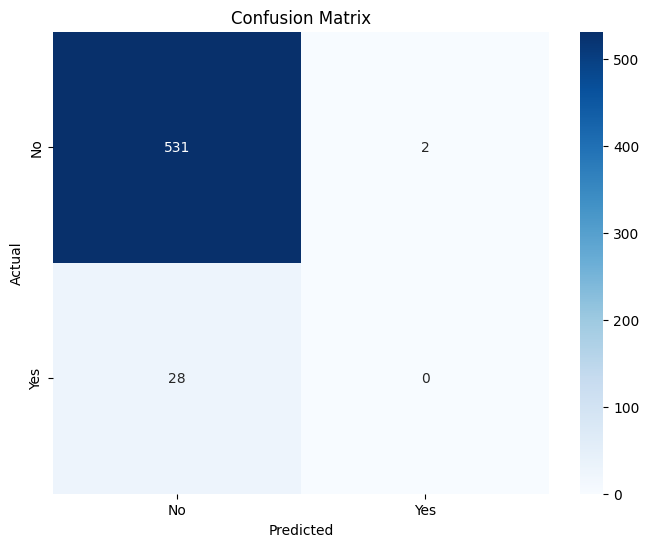

In [16]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()